# Lesson 1: Introduction into Data Science

This lesson showcases major steps of the Data Science lifecycle on a simple example.

The major steps of the Data Science handled in this lesson are:
- Obtain
- Scrub (Clean)
- Explore (EDA)
- Model
- Interpret (Deploy)

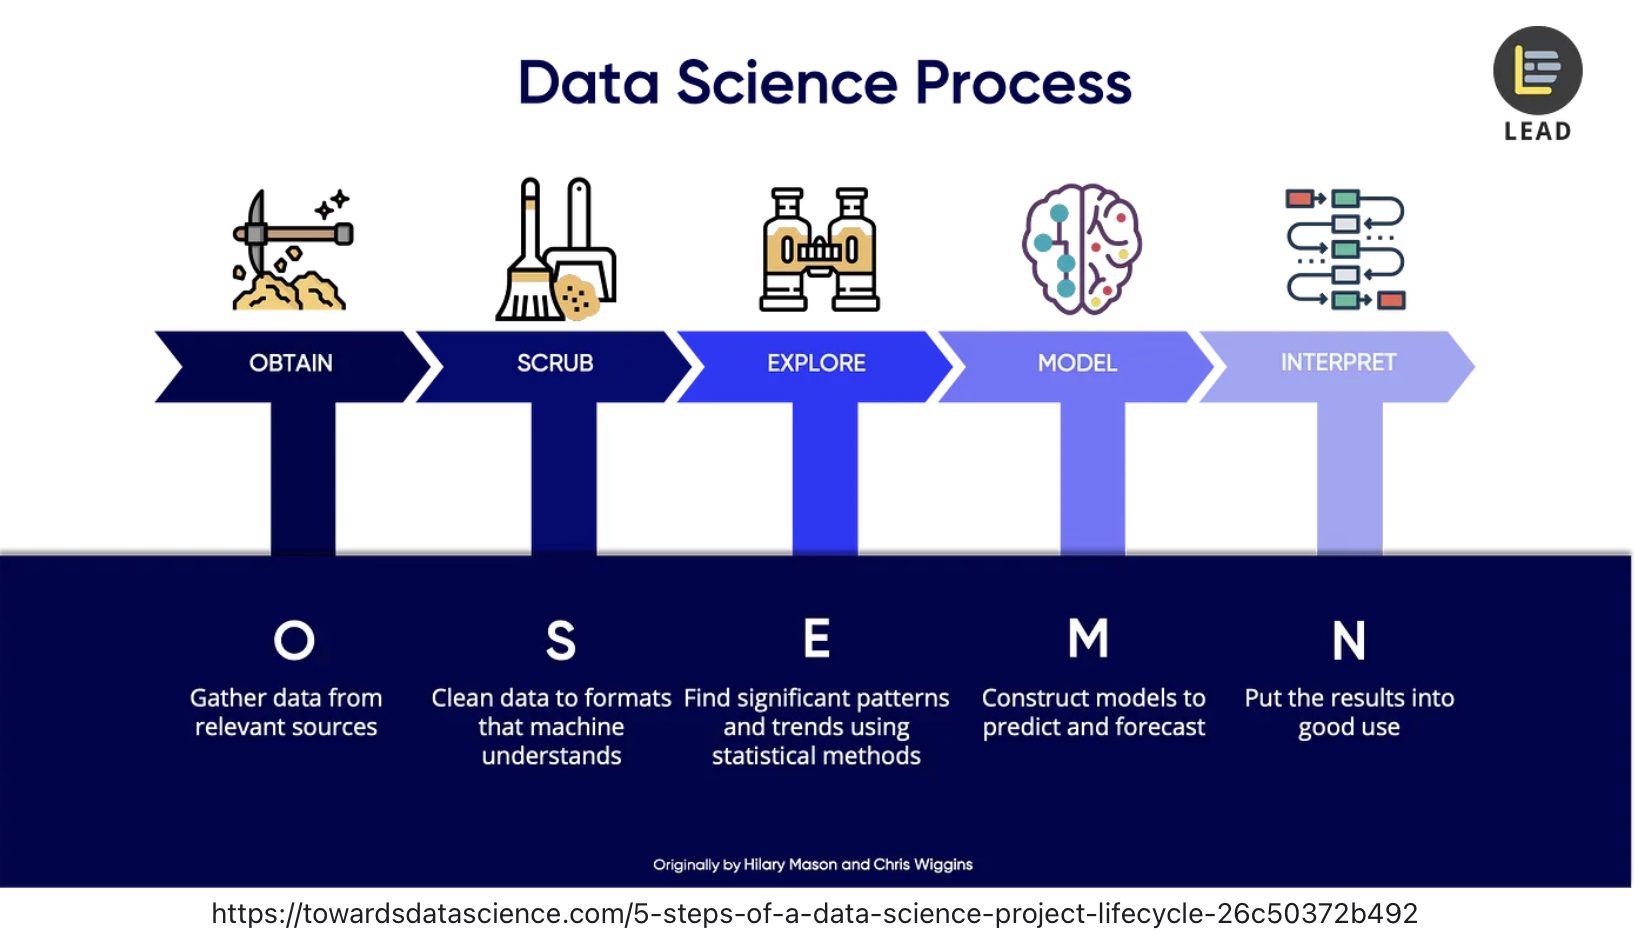

## Step 0: Preparation

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

We will use the Kaggle Titanic data to demonstrate these major steps.
- Data: https://www.kaggle.com/competitions/titanic/data
- Examples used to compose this notebook: https://www.kaggle.com/code/startupsci/titanic-data-science-solutions, https://www.kaggle.com/code/abhishekmamidi/titanic-data-preprocessing-and-visualization/notebook

## Step 1: Obtain

In [3]:
# Import data from Kaggle Titanic Competition
PATH = "../../data/titanic"
train_data = pd.read_csv(os.path.join(PATH, "train.csv"), index_col=0)
test_data = pd.read_csv(os.path.join(PATH, "test.csv"), index_col=0)

train_data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 2-3: Scrub & Explore

What we can do in order to clean data:
- Remove duplicates
- Handle the NaN values (remove or impute)
- Transform categoric values into numeric values (e.g. one-hot-encoding, label encoding)
- Normalize data

### Remove duplicates

In [4]:
# Identify duplicates

len(train_data["Name"].unique()) # == len(train_data)

891

In [6]:
len(test_data["Name"].unique()) # == len(test_data)

True

In [31]:
df_full = pd.concat([train_data.reset_index(drop=False), test_data.reset_index(drop=False)]).reset_index(drop=True)
len(df_full["Name"].unique()) == len(df_full)

False

In [20]:
df_full[df_full["Name"].duplicated(keep=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
289,290,1.0,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q
696,697,0.0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S
0,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
6,898,NaN,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q


In [32]:
df_full[df_full["Ticket"].duplicated(keep=False)].sort_values(by=['Ticket'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
257,258,1.0,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.500,B77,S
504,505,1.0,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.500,B79,S
759,760,1.0,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.500,B77,S
558,559,1.0,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.650,E67,S
262,263,0.0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.650,E67,S
...,...,...,...,...,...,...,...,...,...,...,...,...
736,737,0.0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.375,NaN,S
905,906,NaN,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.175,E31,S
92,93,0.0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.175,E31,S
540,541,1.0,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.000,B22,S


In [44]:
# Documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
# df_without_duplicates = df_full.drop_duplicates(keep="first")
# len(df_without_duplicates)

891

### Handle the NaN values

In [35]:
# Train data
column_names = train_data.columns
print("***Empty value counts***")
for column in column_names:
    nan_values = train_data[column].isnull().sum()
    if nan_values > 0:
        print(f"{column}: {nan_values}")


***Empty value counts***
Age: 177
Cabin: 687
Embarked: 2


In [36]:
train_data[train_data["Age"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


In [37]:
train_data.dropna(subset=['Age'], inplace=True)
train_data[train_data["Age"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [41]:
train_data = train_data.drop(["Cabin"], axis=1)

## Step 3: Explore

In [43]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [51]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.655914
1,2,0.479769
2,3,0.239437


In [53]:
train_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.754789
1,male,0.205298
